## *Proglog*

*Attention and resources have been allocated to rise of new wars and global vaccination development and dissemination efforts. As we  transition into post-pandemic times, I hope my article below will solicit your attention to help battle the global crisis on human trafficking with your machine learning and data analytics expertise. Your input of any kind is greatly appreciated and I sincerely thank you all in advance for investing your time and interests to skimming through my draft.*
    
*Keywords: child-, adult-, women-, and human trafficking; machine learning solutions*
    
<div style="background-color:black; padding:1em" >
![](http://)<img src='https://www.bluebutterflyfoundation.org/images/TraffickedGirlFace.jpeg' width="380px"/>
<img src='https://www.bluebutterflyfoundation.org/images/TraffickedBoys.jpeg' width="400px"/>
<BR>
<p style="color:gray">Image source: <a href='https://www.bluebutterflyfoundation.org/child_trafficking_nepal.php'>https://www.bluebutterflyfoundation.org/child_trafficking_nepal.php</a></p>
</div>

## Disclaimer

This notebook gratefully acknowledges authors of the following notebooks:
- [Research Paper Recommendation](https://www.kaggle.com/code/harshsingh2209/research-paper-recommendation)
- ...

<hr>
    
## Introduction 

Human trafficking, a serious violation of our basic human rights, is a global concern that impacts all social classes, demographics, gender, and races. Estimates from the International Labour Organization made in 2016 suggest that more than five people across the globe fall prey to human trafficking each day [(Toney-Butler et al.)](#ref_defn), affecting more than forty three million families worldwide, with 72% of the victims being women and girls. Newer statistics estimate that *forced labour* had victimized 25 million people and *forced marriages* victimized another 15.4 million individuals globally. Unfortunately, [most of these statistics are underestimated](#ref_stats) as it remains unknown the survival rates of victims trafficked for [forced begging](#ref_beg), child soldiers, organ removals, etc.

      
The physical and psychological harms done to victims are perminent, if not fetal. Survivors of forced labour were studied by [(Gezie et al. 2021)](#ref_harm) to analyze the extents of their physical health after their rescues. Among the 1,387 study participants who transited through the corridors of Ehiopia for forced labour, 37% of them got exploited in housework; 27% in animal and agriculture farming; 18% in services and manufacturing industries. After they were rescued, a majority of them reported health problems as urinary tract infections, gynaecological problems, bone fracture, back pain, stomachache, forgetfulness, etc. 


From an economic standpoint, human trafficking is a $150 billion business that plagues all types of sectors, including forced labour in beauty industries, entertainment, hospitality, construction, agriculture, commercial fishing. The regions are vast; forced labour in commercial fishing alone happening in the United States, United Arab Emirate, Thailand, Taiwan, Sudan, Philippines, Ireland, etc. These criminal recruitments are done systematically via the following elements that collectively described in what is known as the **A-M-P model** [(Dimas et al. 2022)](#ref_analytics):
- **A**ctions that perpetrators take to induce (recruits, harbors, transports, provides, etc.)
- **M**eans of "force, fraud, or coercion" [(Toney-Butler et al.)](#ref_defn) they use
- **P**urposes of illegal recruitment for commercial sex or labour trafficking.

At the same time, vulnerability risk factors include adverse childhood experiences and/or any prior experiences of sexual abuse, sexual assault, domestic violence, gang violence, community-violent exposures, as well as the lack of education, awareness, cultural exploitations. Traffickers do not discriminate by age, gender, race, nor social class and recruit *anywhere*. While predominantly in developing countries and countries at war, the European Council's website presents countless stories of survivors from developed countries, cases include teens from Netherlands who got seduced by their partners into prostitution within their home countries, and transiting foreigners who got "detained" and forced into domestic service when their passports got confiscated in countries such as France.

The search for solutions to rescue victims is immensely difficulty but thankfully are in active pursuits. In  US, legislation combats human trafficking with the **3P's: protect, prosecute, and prevent**. Scholars [(Dimas et al. 2022)](#ref_analytics) add **partnership** to emphasize the critical importance of collaborations across multiple disciplines as healthcare providers, social workers, prosecutors, police, etc. The European Union's four-year strategy also allocated 13 million European dollars since 2021 to disrupt the online and offline business model of traffickers. 

Data from various meta reviews [(Athreya, 2020)](#ref_econ), [(Milivojevic et al. 2021)](#ref_tech) show that technologies to combat trafficking include:
- **Tracking**: Identifying sources of slavery perpetrators and tracking their activities
- ~~**Identify**: crack down criminal organizations~~
- **Prosecution**: Punishing criminals using technologies that lead to successful prosecution 

In this article, we will examine ***how Kaggle and the machine learning communities are combatting this ~~problem~ along some of these fronts***. We will also investigate how technological advances are being exploited by traffickers and ~how the global community may possibly fight best in this constant battle~.

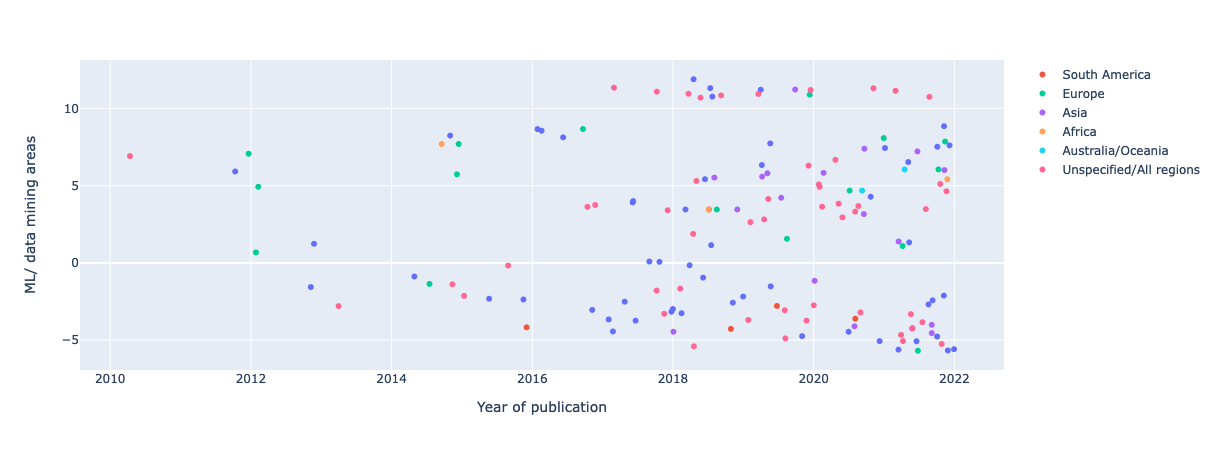

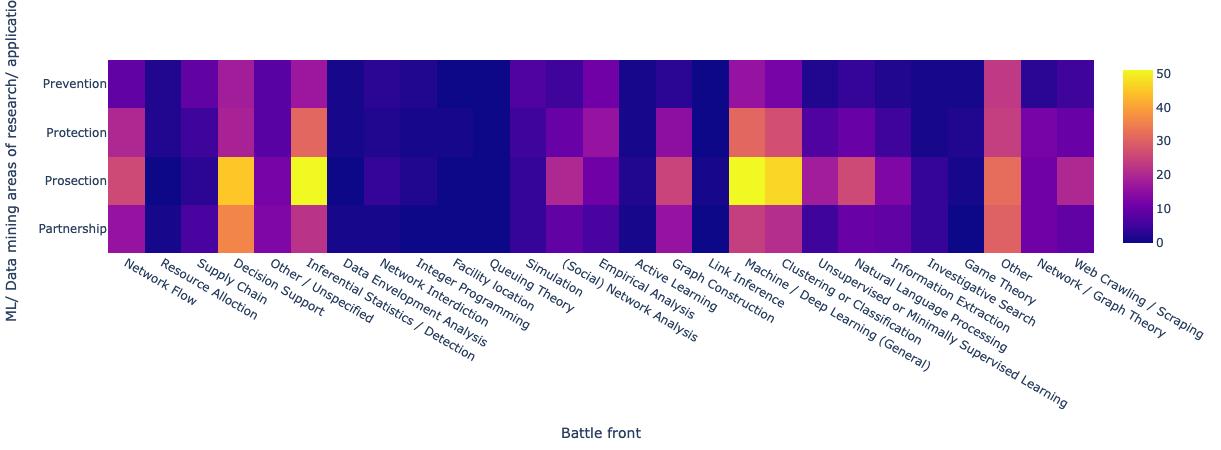

<Figure size 640x480 with 0 Axes>

In [370]:
from IPython.core.display import display, HTML
html_code="""
<img src='/kaggle/working/Dimas2022_lit.png' />
<img src='/kaggle/working/Dimas2022_heatmap.png' />
"""
#display(HTML(html_code))

from pathlib import Path
import matplotlib.pyplot as plt
import IPython
from IPython.display import display

#%matplotlib inline; IPython.display.Image( filename='/kaggle/working/Dimas2022_lit.png')

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.losses import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
#!rm -fR /kaggle/working/*
#!pip install -U kaleido #--target==kaggle/working/site-packages/ # to export figures from plotly

import umap

import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# !pip install --quiet pycountry_convert
# from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3
import os, sys

# https://www.kaggle.com/discussions/product-feedback/43354
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# original lit_review22 = pd.read_csv('htts://raw.githubusercontent.com/gldimas/Dimas-et.-al-2022_Human-Trafficking-Literature-Review/main/Original%20Manuscript%20Data%20and%20Tool/2022_Operations%20Research%20and%20Analytics%20to%20Combat%20Human%20Trafficking%20A%20Review%20of%20Academic%20Literature_Data.csv')
# updated version    
#lit_review22 = pd.read_csv('https://raw.githubusercontent.com/gldimas/Dimas-et.-al-2022_Human-Trafficking-Literature-Review/main/Updated%20Versions%20of%20Data%20and%20Dashboard/Current%20Versions%20of%20Data%20and%20Dashboard/08_29_2022_Operations%20Research%20and%20Analytics%20to%20Combat%20Human%20Trafficking%20A%20Review%20of%20Academic%20Literature_Data.csv')      

#!pip install xlrd; import xlrd
sheet = '2022_Operations Research and An'
#xlsm_df=pd.read_excel('https://github.com/gldimas/Dimas-et.-al-2022_Human-Trafficking-Literature-Review/raw/main/Updated%20Versions%20of%20Data%20and%20Dashboard/Current%20Versions%20of%20Data%20and%20Dashboard/08_29_2022_ImprovedMacro_DetailedAnalysis_2022_Operations%20Research%20and%20Analytics%20to%20Combat%20Human%20Trafficking%20A%20Review%20of%20Academic%20Literature_Data.xlsm', sheet_name=sheet)
#print( xlsm_df.shape, xlsm_df.columns )

streams = ['Prevention', 'Protection', 'Prosection','Partnership'] 
regions  = ['North America', 'South America',
           'Europe', 'Asia', 'Africa', 'Australia/Oceania',
           'Unspecified/All regions']

flds = ['Network Flow', 'Resource Alloction',
           'Supply Chain', 'Decision Support', 'Other / Unspecified',
           'Inferential Statistics / Detection', 
           'Data Envelopment Analysis', 'Network Interdiction',
           'Integer Programming', 'Facility location', 'Queuing Theory',
           'Simulation', '(Social) Network Analysis', 'Empirical Analysis',
           'Active Learning', 'Graph Construction', 'Link Inference',
           'Machine / Deep Learning (General)', 'Clustering or Classification',
           'Unsupervised or Minimally Supervised Learning',
           'Natural Language Processing', 'Information Extraction',
           'Investigative Search', 'Game Theory', 'Other',
           'Network / Graph Theory', 'Web Crawling / Scraping'] 

df=xlsm_df[flds] 

#my_umap = umap.UMAP(n_components=1); fitted = my_umap.fit(df.to_numpy()); 
xlsm_df[ ['umap_order']]= my_umap.transform(df.to_numpy()); 

import plotly.graph_objects as go
fig = go.Figure();

clrs=['red','green','blue','purple', 'yellow', 'cyan', 'lightgreen']
for i,r in enumerate(regions):
    q = np.where( np.asarray( xlsm_df[[r]] ) )[0] 
     
    y=xlsm_df.loc[q,'umap_order'].values    
    x=xlsm_df.loc[q,'Year Published'].values *1.        
    x+= np.random.random( len(q) )*1.                
    z=xlsm_df.loc[q,flds]    
        
    l1='Year of publication'
    l2='ML/ data mining areas'
    
    dfn = pd.DataFrame( {l1:x, l2:y, 'area': r })
    dfn= pd.concat( [dfn, z ] )    
    if i==0:
        fig=px.scatter( dfn, x=l1, y=l2, ) 
    else:            
        o=1
        fig.add_trace(go.Scatter( x=x, y=y, mode='markers', name=r, ) );
fig.show();
#fig.write_image('/kaggle/working/Dimas2022_lit.png')       
plt.savefig('/kaggle/working/Dimas2022_lit.png' );

stream_area = np.zeros( ( 4, len(flds) ))
for i in range(xlsm_df.shape[0]):    
    Q1= np.where( xlsm_df.loc[i, flds ] )[0]
    Q2= np.where( xlsm_df.loc[i, streams ] )[0]   
    for q1 in Q1:  
        for q2 in Q2:
            stream_area[ q2, q1 ]+=1    
df=pd.DataFrame( stream_area, columns = flds, index=streams ) #.transpose()

fig=px.imshow(df, text_auto=True, aspect='auto', labels={'y':'ML/ Data mining areas of research/ application','x':'Battle front'}); 
fig.show();           
#fig.write_image('/kaggle/working/Dimas2022_heatmapa.png')
plt.savefig('/kaggle/working/Dimas2022_heatmap.png' );

In [346]:
def plot_lit(lit_review22):
    
    df = lit_review22[['Prevention', 'Protection', 'Prosection','Partnership'] ]

    lit_review22['solution_categories'] = pd.get_dummies( df ).idxmax(1)

    df = lit_review22[['Network Flow', 'Resource Alloction',
           'Supply Chain', 'Decision Support', 'Other / Unspecified',
           'Inferential Statistics / Detection', 
           'Data Envelopment Analysis', 'Network Interdiction',
           'Integer Programming', 'Facility location', 'Queuing Theory',
           'Simulation', '(Social) Network Analysis', 'Empirical Analysis',
           'Active Learning', 'Graph Construction', 'Link Inference',
           'Machine / Deep Learning (General)', 'Clustering or Classification',
           'Unsupervised or Minimally Supervised Learning',
           'Natural Language Processing', 'Information Extraction',
           'Investigative Search', 'Game Theory', 'Other',
           'Network / Graph Theory', 'Web Crawling / Scraping'] ]


    lit_review22['research_topics'] = pd.get_dummies( df ).idxmax(1)

    df = lit_review22[['Female', 'Male'] ]
    lit_review22['gender'] = pd.get_dummies( df ).idxmax(1)
    print(lit_review22['gender'] .unique() )


    df = lit_review22[['North America', 'South America',
           'Europe', 'Asia', 'Africa', 'Australia/Oceania',
           'Unspecified/All regions']]
    lit_review22['regions'] = pd.get_dummies( df ).idxmax(1)    

    #px.sunburst( lit_review22, path=['research_topics','regions' ])

    #df=pd.DataFrame( { 'f':data_bar_f/data_bar_f.sum()*100, 'm':data_bar_m/data_bar_m.sum()*100 })
    #fig=px.bar(df) 

    fig=px.histogram( lit_review22, color='regions', y='research_topics');
    fig.show()
    # plot_lit(xlsm_df)

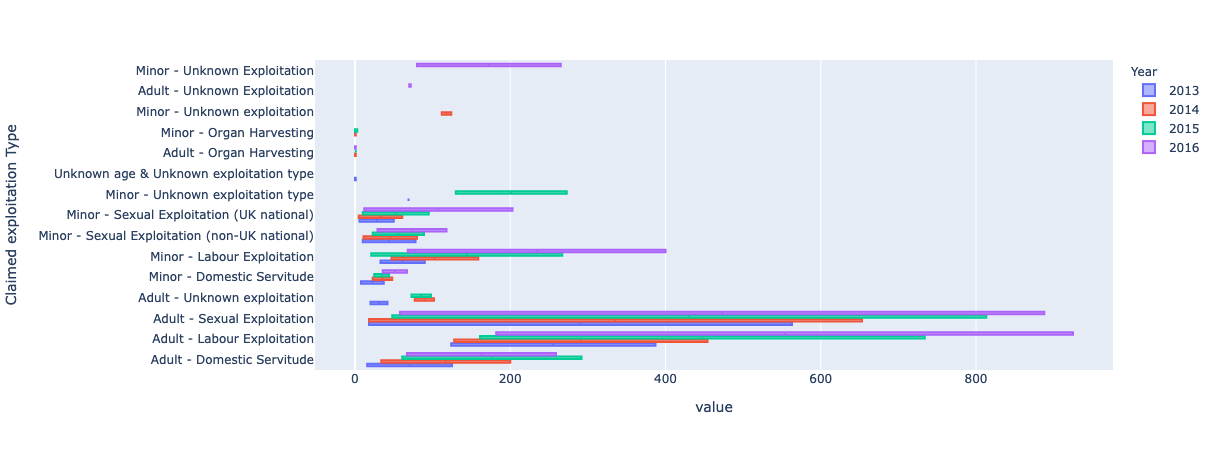

In [347]:
uk_2013 = pd.read_csv('../input/uk-human-trafficking-data/2013_exploitation_type.csv')
uk_2014 = pd.read_csv('../input/uk-human-trafficking-data/2014_exploitation_type.csv')
uk_2015 = pd.read_csv('../input/uk-human-trafficking-data/2015_exploitation_type.csv')
uk_2016 = pd.read_csv('../input/uk-human-trafficking-data/2016_exploitation_type.csv')
uk_2016.rename( columns={'Claimed Exploitation Type':'Claimed exploitation Type'} , inplace=True)
uk_2016.rename( columns={'Trans- gender':'Transgender'} , inplace=True)
uk_2015.rename( columns={'Transsexual':'Transgender'} , inplace=True)

uk_2013['Year']=2013
uk_2014['Year']=2014
uk_2015['Year']=2015
uk_2016['Year']=2016

df=pd.concat( [uk_2013.loc[:9,:],uk_2014.loc[:10,:],uk_2015.loc[:10,:],uk_2016.loc[:9,:] ] )

px.box( df, x=['Female','Male'], color='Year', y='Claimed exploitation Type' )  

## Adapted materials to generate normalized graphs

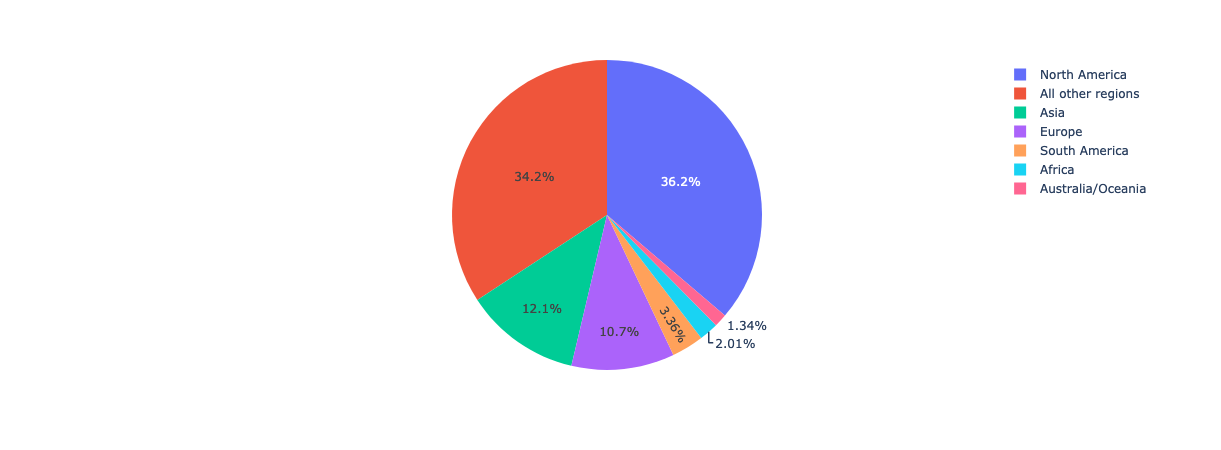

In [348]:

df = pd.DataFrame( { 'Article counts': [3,18,2,16,54,5,51], 'regions':['Africa','Asia', 'Australia/Oceania' ,'Europe', 'North America', 'South America', 'All other regions']  })
fig=px.pie( df, values='Article counts', names='regions' )
fig.show()




In [349]:
data = pd.read_csv('../input/global-human-trafficking/human_trafficking.csv')
data.replace('-99', np.nan, inplace=True)
data.replace(-99, np.nan, inplace=True)

In [350]:
def get_alpha3(col):
    try:
        iso_3 =  country_name_to_country_alpha3(col)
    except:
        iso_3 = 'Unknown'
    return iso_3

def get_name(col):
    try:
        name =  country_alpha2_to_country_name(col)
    except:
        name = 'Unknown'
    return name

In [351]:
data['country'] = data['citizenship'].apply(lambda x: get_name(x))
data['alpha_3'] = data['country'].apply(lambda x: get_alpha3(x))
data_map = pd.DataFrame(data.groupby(['country', 'alpha_3'])['alpha_3'].agg(Victims='count')).reset_index()

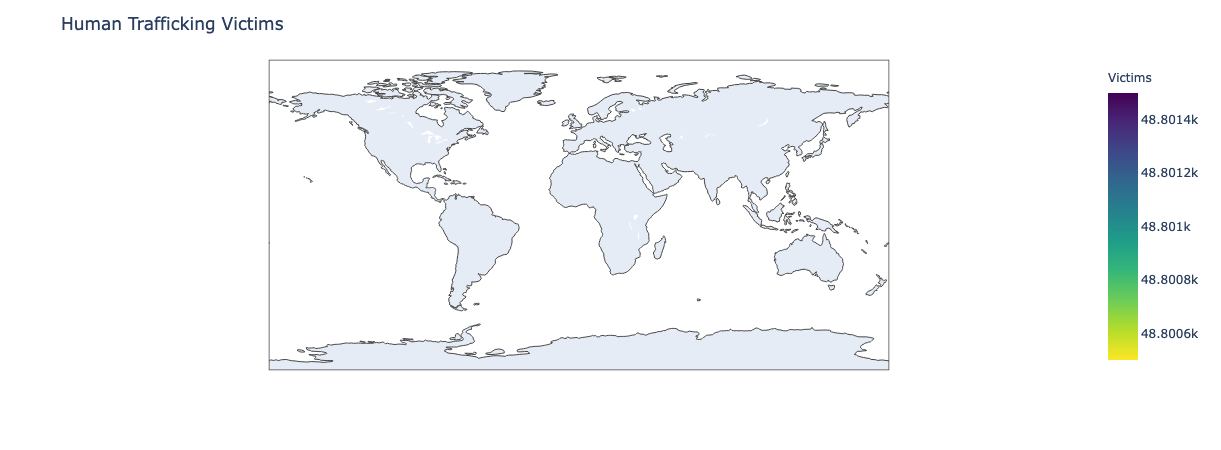

In [352]:
fig = px.choropleth(data_map, locations="alpha_3",
                    color="Victims",
                    hover_name="country",
                    color_continuous_scale='Viridis_r')
fig.update_layout(title_text="Human Trafficking Victims")
fig.show()

In [353]:
cm = sns.light_palette("red", as_cmap=True)
table = pd.pivot_table(data, values='Datasource', index='country',
                    columns='yearOfRegistration', aggfunc='count', fill_value=0)
table.style.background_gradient(cmap=cm)

yearOfRegistration,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,
Unknown,1026,357,223,1455,1423,1417,802,587,943,1340,1367,1832,3000,4276,16399,6508,5818,28


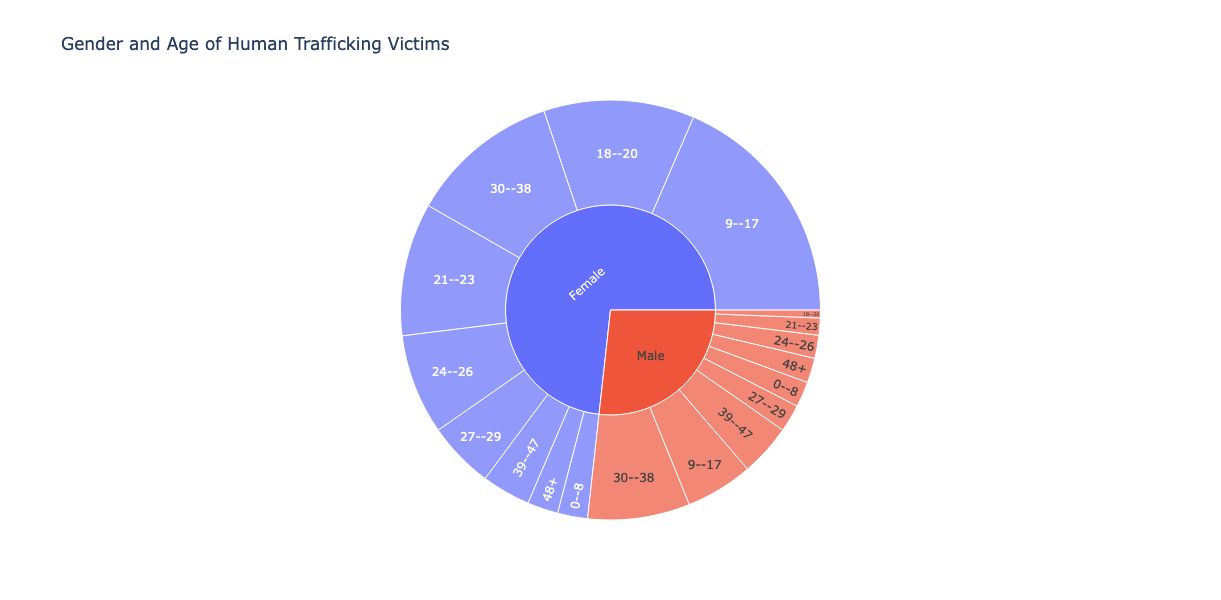

In [354]:
data['Victims'] = 1
fig = px.sunburst(data[data.ageBroad.notna()], path=['gender', 'ageBroad'], values='Victims', color='gender',
                  title='Gender and Age of Human Trafficking Victims')
fig.update_layout(width=600, height=600)
fig.show()

In [355]:
data_bar_mg = pd.DataFrame(data.groupby(['gender', 'majorityStatus'])['majorityStatus'].agg(Victims='count')).reset_index()

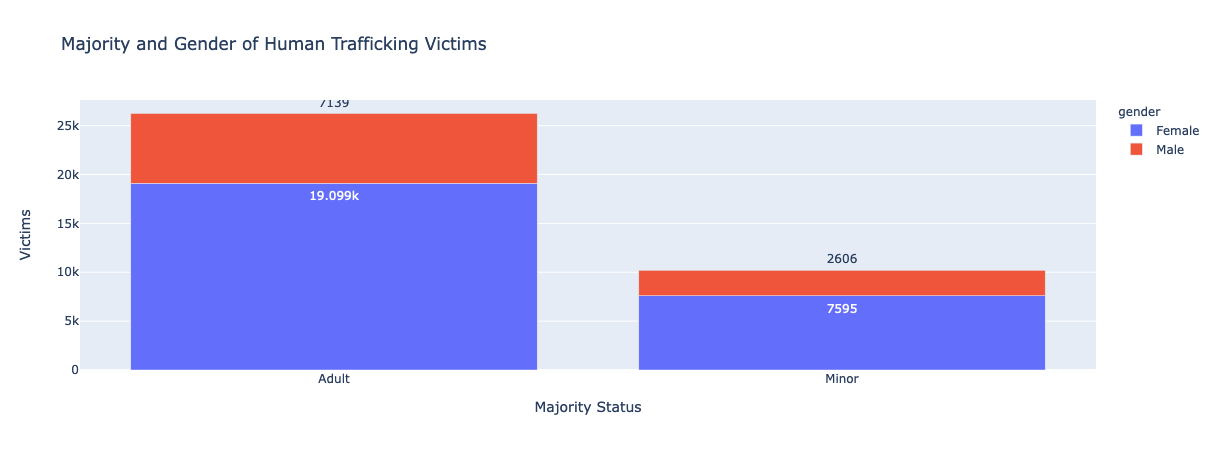

In [356]:
fig = px.bar(data_bar_mg, x="majorityStatus", y="Victims", color="gender", 
            title="Majority and Gender of Human Trafficking Victims",
            labels={'majorityStatus':'Majority Status'})
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(hovermode='x')
fig.show()

In [357]:
data['meansOfControlConcatenated'] = data['meansOfControlConcatenated'].str.replace('Abuse', 'abuse', regex=True)
data_bar_f = data[(data.meansOfControlConcatenated.notna()) & (data.gender == 'Female')].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
data_bar_m = data[(data.meansOfControlConcatenated.notna()) & (data.gender == 'Male')].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

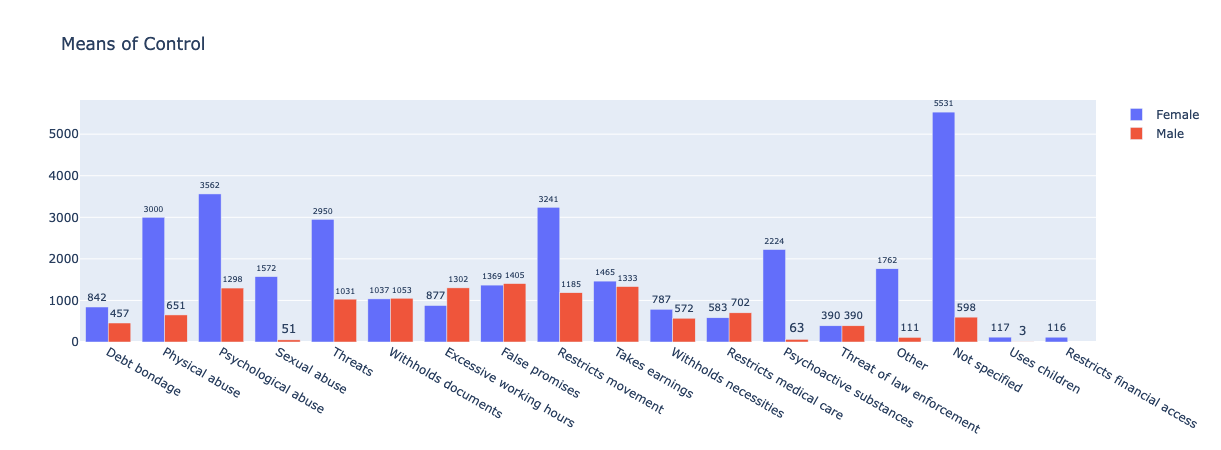

In [358]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=data_bar_f.index, y=data_bar_f),
    go.Bar(name='Male', x=data_bar_m.index, y=data_bar_m)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(hovermode='x', title_text='Means of Control')
fig.show()

In [359]:
table2 = pd.DataFrame()
for i in data[data.ageBroad.notna()].ageBroad.unique():
    age_col = pd.DataFrame(data[(data.meansOfControlConcatenated.notna()) & (data.ageBroad == i)].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0))
    age_col.rename(columns={0: i}, inplace=True)
    table2 = pd.concat([table2,age_col],axis=1)

age_list = ['0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+']
table2 = table2.reindex(columns=age_list)

In [360]:
table2.fillna(0).style.background_gradient(cmap=cm).format('{:,.0f}')

,0--8,9--17,18--20,21--23,24--26,27--29,30--38,39--47,48+
Physical abuse,38,644,495,486,466,325,771,252,163
Psychological abuse,88,"1,020",535,515,524,373,"1,153",393,256
Sexual abuse,45,471,220,212,219,116,229,68,37
Debt bondage,0,88,112,144,231,138,357,119,73
Excessive working hours,11,106,43,149,234,189,847,385,215
False promises,32,199,133,213,336,243,937,370,218
Psychoactive substances,5,709,362,328,264,166,328,82,43
Restricts medical care,2,26,39,88,174,131,474,200,151
Restricts movement,19,688,575,532,554,383,"1,092",366,190
Takes earnings,14,143,202,292,357,266,925,380,219


In [361]:
data_bar_f = data[(data.typeOfExploitConcatenated.notna()) & (data.gender == 'Female')].typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
data_bar_m = data[(data.typeOfExploitConcatenated.notna()) & (data.gender == 'Male')].typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

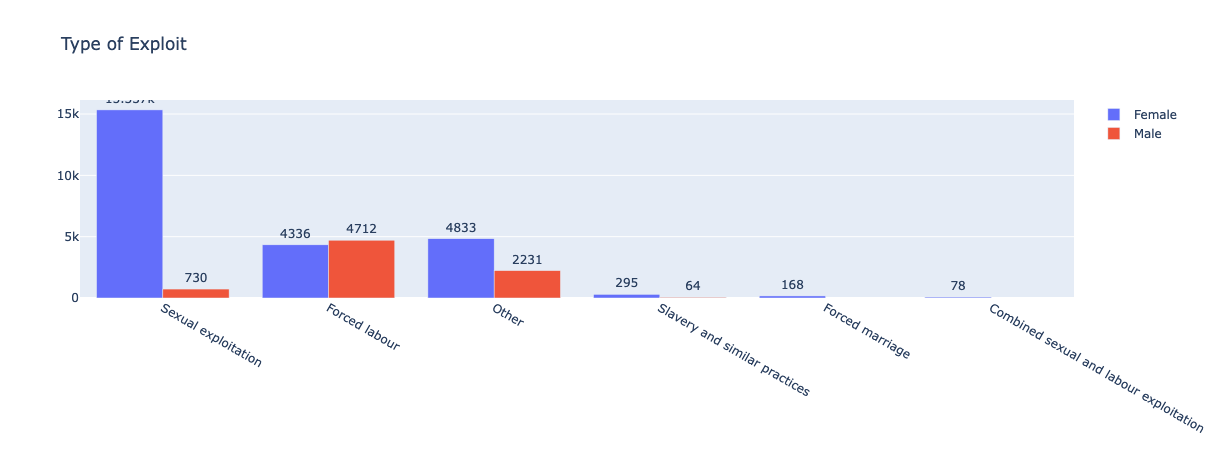

In [362]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=data_bar_f.index, y=data_bar_f),
    go.Bar(name='Male', x=data_bar_m.index, y=data_bar_m)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(title_text='Type of Exploit')
fig.show()

In [363]:
table3 = pd.DataFrame()
for i in data[data.ageBroad.notna()].ageBroad.unique():
    age_col = pd.DataFrame(data[(data.typeOfExploitConcatenated.notna()) & (data.ageBroad == i)].typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0))
    age_col.rename(columns={0: i}, inplace=True)
    table3 = pd.concat([table3,age_col],axis=1)
    
table3 = table3.reindex(columns=age_list)

In [364]:
table3.fillna(0).style.background_gradient(cmap=cm).format('{:,.0f}')

,0--8,9--17,18--20,21--23,24--26,27--29,30--38,39--47,48+
Sexual exploitation,158,"5,077","2,936","2,350","1,568",891,"1,605",388,167
Forced labour,205,"1,079",193,339,467,582,"2,331","1,040",376
Forced marriage,0,11,15,27,15,11,0,0,0
Combined sexual and labour exploitation,0,32,14,0,0,0,32,0,0
Other,30,52,0,16,0,0,29,30,0


In [365]:
data_sex_type = data.typeOfSexConcatenated.value_counts()

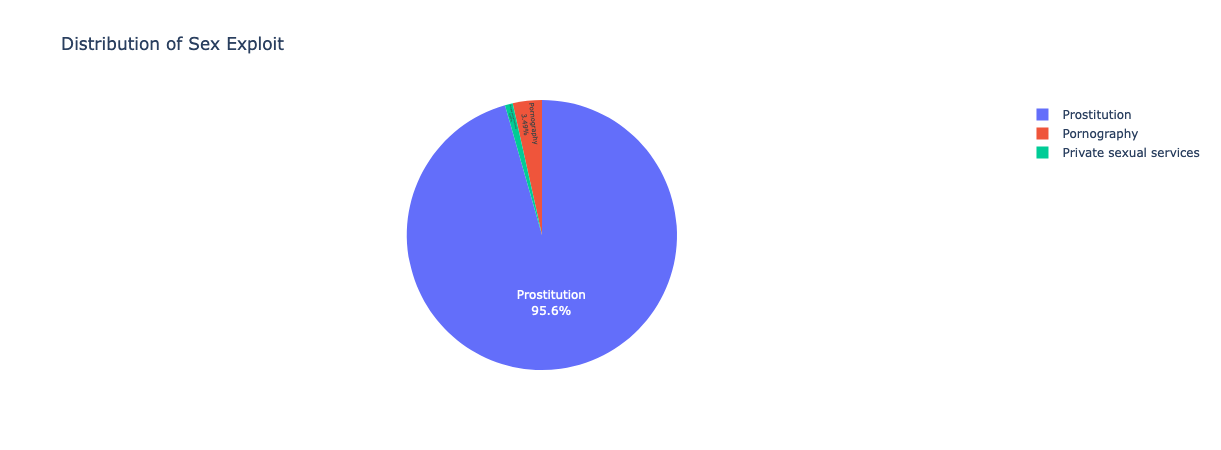

In [366]:
fig = px.pie(data_sex_type, values=data_sex_type, names=data_sex_type.index,
            title="Distribution of Sex Exploit")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [367]:
data_bar_f = data[(data.RecruiterRelationship.notna()) & (data.gender == 'Female')].RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split("; "))).sum(axis = 0)
data_bar_m = data[(data.RecruiterRelationship.notna()) & (data.gender == 'Male')].RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split("; "))).sum(axis = 0)

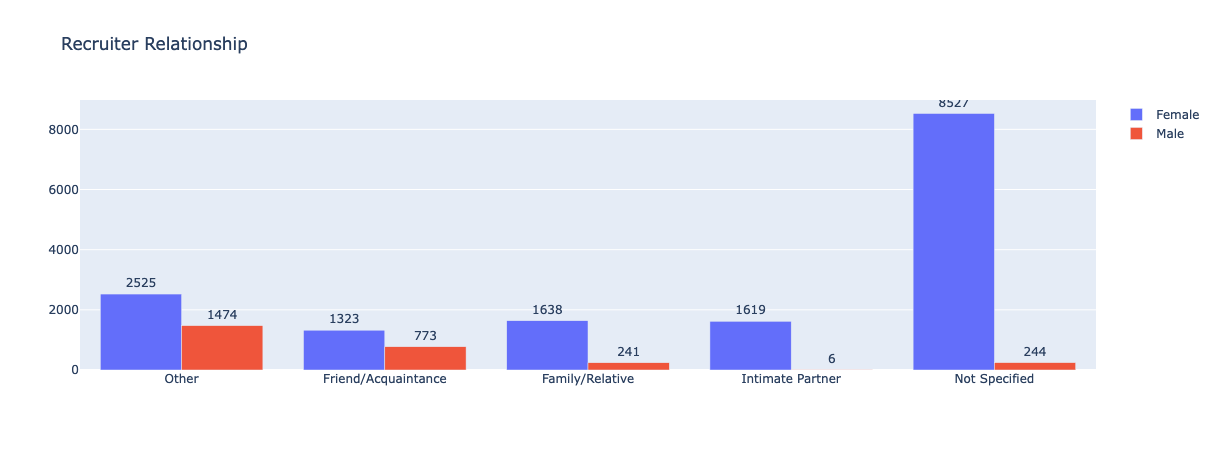

In [368]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=data_bar_f.index, y=data_bar_f),
    go.Bar(name='Male', x=data_bar_m.index, y=data_bar_m)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(title_text='Recruiter Relationship')
fig.show()

In [369]:
df=pd.DataFrame( { 'f':data_bar_f/data_bar_f.sum()*100, 'm':data_bar_m/data_bar_m.sum()*100 })
fig=px.bar(df) 



## References [MLA]
 
1. <a id="ref_stats"></a> Vanessa Bouché and Madeleine Bailey. 2020. The UNODC Global Report on Trafficking in Persons: An Aspirational Tool with Great Potential. The Palgrave International Handbook of Human Trafficking (2020), 163–176.
3. <a id="ref_beg"></a> The Borgen Project [Internet] March 7, 2023  https://www.borgenmagazine.com/human-trafficking-in-india/ 
4. <a id="ref_fishing"></a> Mileski, Joan P., Cassia Bomer Galvao, and Zaida Denise Forester. "Human trafficking in the commercial fishing industry: a multiple case study analysis." _Marine Policy_ 116 (2020): 103616.
5. <a id="ref_lin"></a> Lin Y, Chen P, Ho C. Hotel Recognition to Combat Human Trafficking. Stanford, CA. 2022
6. <a id="ref_econ"></a> Athreya, B. ‘Slaves to Technology: Worker control in the surveillance economy’, Anti-Trafficking Review,_ issue 15, 2020, pp. 82-101, https://doi.org/10.14197/atr.201220155
7. <a id="ref_harm"></a> Gezie, L.D. and Atinafu, A. (2021), "Physical health symptoms among Ethiopian returnees who were trafficked aboard", International Journal of Migration, Health and Social Care, Vol. 17 No. 2, pp. 215-223. https://doi.org/10.1108/IJMHSC-05-2020-0051
8. <a id="ref_tech"></a> Milivojevic S., Moore H., and Segrave M., ‘Freeing the Modern Slaves, One Click at a Time: Theorising human trafficking, modern slavery, and technology’,  Anti-Trafficking Review, issue 14, 2020, pp. 16-32,  https://doi.org/10.14197/atr.201220142
9. <a id="ref_defn"></a>  Toney-Butler TJ, Ladd M, Mittel O. Human Trafficking. [Updated 2023 Jan 29]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2023 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK430910/
10. <a id="ref_analytics"></a> Dimas GL, Konrad RA, Lee Maass K, Trapp AC (2022) Operations research and analytics to combat human trafficking: A systematic review of academic literature. PLoS ONE 17(8): e0273708. https://doi.org/10.1371/journal.pone.0273708
11. <a id="ref_freedom"></a> Ian Vásquez, Fred McMahon, Ryan Murphy, and Guillermina Sutter Schneider, _The Human Freedom Index 2022: A Global Measurement of Personal, Civil, and Economic Freedom_ (Washington: Cato Institute and the Fraser Institute, 2022).
12. <a id="ref_hotel50k"></a> Stylianou, A., Xuan, H., Shende, M., Brandt, J., Souvenir, R., & Pless, R. (2019). Hotels-50K: A Global Hotel Recognition Dataset. _Proceedings of the AAAI Conference on Artificial Intelligence_, _33_(01), 726-733. https://doi.org/10.1609/aaai.v33i01.3301726 
13. <a id="ref_farrell"></a>  Farrell A, Dank M, Ieke de Vries, Kafafian M, Hughes A, Lockwood S. (2019) Failing victims? Challenges of the police response to human trafficking. Criminology and Public Policy https://doi.org/10.1111/1745-9133.124566 
14.  <a id="ref_massage"></a> Tobey, Margaret, et al. "Interpretable models for the automated detection of human trafficking in illicit massage businesses." _IISE Transactions_ (2022): 1-14.
15. <a id="ref_game"></a> Peterson, Emily. (2019) "Analysis of 2018 Human Trafficking Location Data from skipthegames. com."  Pilot Scholar, University of Portland. Engineering Undergraduate Publications, Presentations and Projects: 9. https://pilotscholars.up.edu/egr_studpubs/9

# Supplementary

 
<img src="https://img.freepik.com/free-vector/human-trafficking-report-infographic-layout-chart_1284-8451.jpg?w=740&t=st=1688421057~exp=1688421657~hmac=e1cde90c0dc1cad10235da5d7dde4346c22b3c359586284fd31b02e352e9a2a1" alt="" style="height: 1000px; width:1000px"/>

<a href='https://www.dhs.gov/blue-campaign/infographic'>Source: Blue Campaign</a>